In [1]:
## Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
## Reading the Dataset
data = pd.read_csv('SalaryData_Train(1).csv')
data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Exploratory Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [4]:
data.shape

(30161, 14)

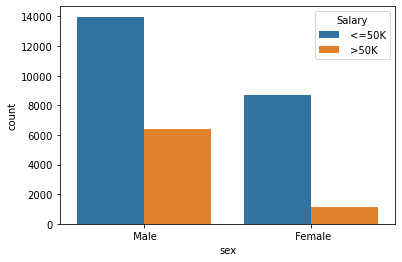

In [5]:
sns.countplot(x='sex', hue='Salary', data=data)

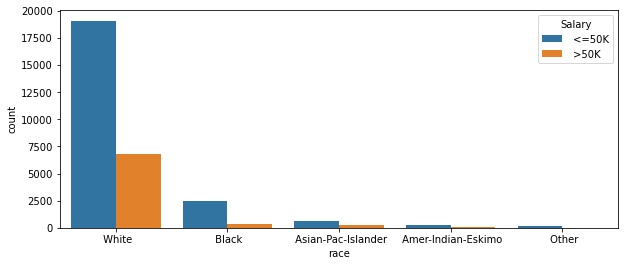

In [6]:
plt.figure(figsize=(10,4))
sns.countplot(x='race', hue='Salary', data=data)

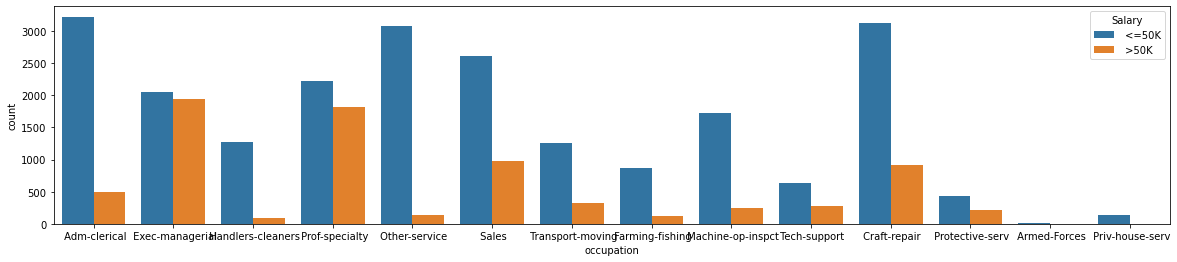

In [7]:
plt.figure(figsize=(20,4))
sns.countplot(x='occupation', hue='Salary', data=data)

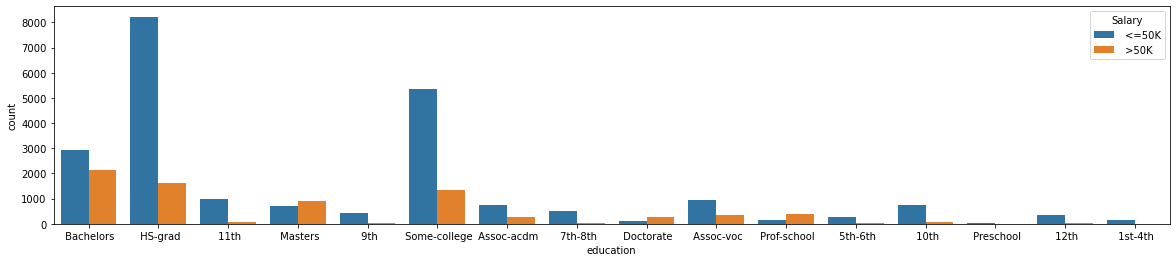

In [8]:
plt.figure(figsize=(20,4))
sns.countplot(x='education', hue='Salary', data=data)

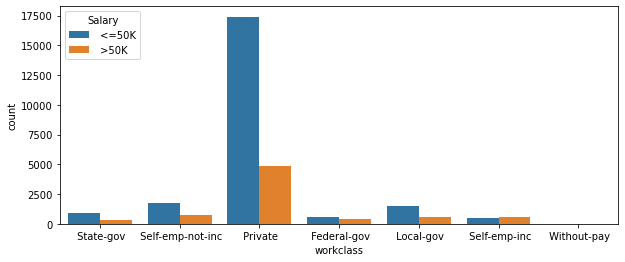

In [9]:
plt.figure(figsize=(10,4))
sns.countplot(x='workclass', hue='Salary', data=data)

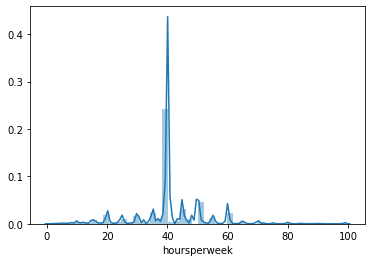

In [10]:
sns.distplot(data['hoursperweek'])

(array([4869., 5579., 5760., 5925., 3810., 2412., 1278.,  359.,  114.,
          55.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <a list of 10 Patch objects>)

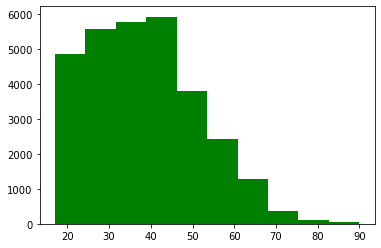

In [11]:
plt.hist(data['age'], color='green')

C:\Users\rayad\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


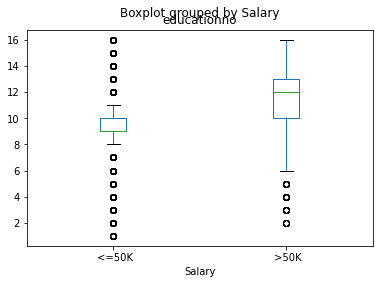

In [12]:
data.boxplot(by='Salary', column=['educationno'], grid=False)

In [13]:
data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [14]:
X_train = data.iloc[:, :-1]
X_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [15]:
Y_train = data['Salary']
Y_train

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
30156     <=50K
30157      >50K
30158     <=50K
30159     <=50K
30160      >50K
Name: Salary, Length: 30161, dtype: object

In [16]:
X_train = pd.get_dummies(X_train)
X_train.head(3)

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [17]:
X_train.shape

(30161, 102)

In [18]:
cols = X_train.columns

In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [20]:
### Encoded '0' for <= 50K and '1' for >50K
Y_train= encoder.fit_transform(Y_train)
Y_train

array([0, 0, 0, ..., 0, 0, 1])

In [21]:
### Normalization
def normal(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [22]:
X_train_norm = normal(X_train)

In [23]:
X_train = pd.DataFrame(X_train_norm, columns=cols)
X_train.head(2)

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,0.301370,0.8,0.02174,0.0,0.397959,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.452055,0.8,0.00000,0.0,0.122449,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [24]:
data_test = pd.read_csv('SalaryData_Test(1).csv')
data_test.shape

(15060, 14)

In [25]:
X_test = data_test.iloc[:, :-1]
X_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States


In [26]:
X_test.shape

(15060, 13)

In [27]:
Y_test = data_test['Salary']
Y_test

0         <=50K
1         <=50K
2          >50K
3          >50K
4         <=50K
          ...  
15055     <=50K
15056     <=50K
15057     <=50K
15058     <=50K
15059      >50K
Name: Salary, Length: 15060, dtype: object

In [28]:
Y_test = encoder.fit_transform(Y_test)
Y_test

array([0, 0, 1, ..., 0, 0, 1])

In [29]:
X_test = pd.get_dummies(X_test)

In [30]:
X_test = normal(X_test)
X_test.head(3)

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,0.109589,0.400000,0.0,0.0,0.397959,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.287671,0.533333,0.0,0.0,0.500000,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.150685,0.733333,0.0,0.0,0.397959,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [31]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

#### Model Building with Linear Kernel

In [32]:
model_linear = SVC(kernel = "linear")
model_linear.fit(X_train, Y_train)
pred_test_linear = model_linear.predict(X_test)

In [33]:
print(confusion_matrix(pred_test_linear, Y_test))

[[10594  1531]
 [  766  2169]]


In [34]:
linear_acc = (accuracy_score(Y_test, pred_test_linear)*100).round(3)
linear_acc

84.748

#### Model with Poly Kernel

In [35]:
model_poly = SVC(kernel='poly')
model_poly.fit(X_train, Y_train)
pred_test_poly = model_poly.predict(X_test)

In [36]:
print(confusion_matrix(pred_test_poly, Y_test))

[[10535  1582]
 [  825  2118]]


In [37]:
poly_acc = (accuracy_score(Y_test, pred_test_poly)*100).round(3)
poly_acc

84.017

#### Model with RBF Kernel

In [38]:
model_rbf = SVC(kernel='rbf')
model_rbf.fit(X_train, Y_train)
pred_test_rbf = model_rbf.predict(X_test)

In [39]:
print(confusion_matrix(pred_test_rbf, Y_test))

[[10530  1612]
 [  830  2088]]


In [44]:
rbf_acc = (accuracy_score(Y_test, pred_test_rbf)*100).round(3)
rbf_acc

83.785

#### Model with Sigmoid Kernel

In [41]:
model_sigmoid = SVC(kernel='sigmoid')
model_sigmoid.fit(X_train, Y_train)
pred_test_sig = model_sigmoid.predict(X_test)

In [42]:
print(confusion_matrix(pred_test_sig, Y_test))

[[9690 1749]
 [1670 1951]]


In [45]:
sig_acc = (accuracy_score(Y_test, pred_test_sig)*100).round(3)
sig_acc

77.297

In [47]:
vif = {'Models': ['Model 1', 'Model 2', 'Model 3', 'Model 4'], 'Accuracy Scores': [linear_acc, poly_acc, rbf_acc, sig_acc]}
acc_df = pd.DataFrame(vif)

In [48]:
## Accuracy Table for different models
acc_df

,Models,Accuracy Scores
0,Model 1,84.748
1,Model 2,84.017
2,Model 3,83.785
3,Model 4,77.297


#### Comparing the above models, model with Linear Kernel is better

In [ ]:
#model = SVC()
#param_grid = [{'kernel':['rbf','poly','sigmoid'],'gamma':[10, 20, 30],'C':[10,15,20] }]
#gsv = GridSearchCV(model,param_grid,cv=5)
#gsv.fit(X_train,Y_train)